# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#fontsize options below make plots more readable
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (4,3)

# More tutorial

## lambda functions

There's a simple way to define functions in a singe line, called a `lambda` function.  For instance $f(x) = x^2$ can be coded simply as

    f = lambda x: x**2    
And multivariable functions are also allowed

    g = lambda x, y: x**2 + 2*y

In [2]:
#Both ways of defining a simple function do the same thing
f = lambda x: x**2

def g(x):
    return x**2

x = 6
print(f(x), g(x))

36 36


## Figures, axes and plt.subplots (review)

If any of the markup cells are messed up, double click on them to reveal the text, and then rerun the cell.

To make more advanced plots we need to create "figure" and "axis" objects with a command like: 
$\texttt{fig, ax = plt.subplots()}$  One reason to do this is so that one "figure" can have multiple "axes" for different plots.  Also this way gives you more control over your plots after you make them.

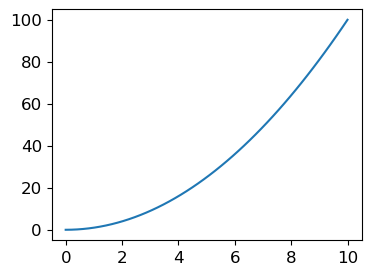

In [3]:
#The simple way
x = np.linspace(0,10)
plt.plot(x, x**2)

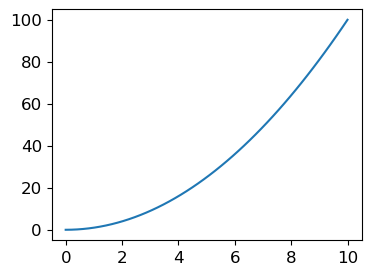

In [4]:
# same as above with figure and axis
fig, ax = plt.subplots()
ax.plot(x, x**2)  #Note that the plotting command is now part of the axis ax!  But the effect is the same.

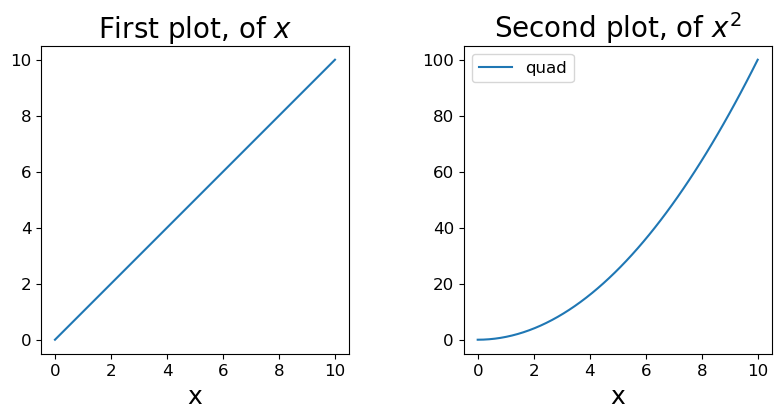

In [5]:
#A simple example of multiple plots
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,4)) #we want to make two plots so need to assign two axes!
ax1.plot(x, x) #the first plot
ax2.plot(x, x**2, label = 'quad') #the second, the label can be used to make a legend (below)
#and you can annotate both plots after making them by saying which one you are adding to. 
ax1.set_title('First plot, of $x$')
ax2.set_title('Second plot, of $x^2$')
ax2.legend() # a legend, using labels specified in plotting command
ax1.set_xlabel('x') #note that the way to set things is different. Just use exmaples like this!
ax2.set_xlabel('x')
ax1.set_aspect('equal') #we can make a square plot if the x, y values are the same
ax2.set_aspect(0.1)  #you can set to a number if x, y values are very different!

### Review Exercise (optional)

Copy the final figure above (with two axes or plots) and make the following changes:
- Add y labels. (Just copy and modify the example for x labels.)
- To the second axis add a curve for f(x) = x (i.e. what's on the first axis), add a label "lin" and make sure this label appears in the legend.

In [ ]:
#your code and plot here

## Intro to "3D" Plots

Our goal will be to plot $\Phi_{\rm eff}(x, y)$.  This is an example of a 3D plot with $z = f(x,y)$.  For a plot we then need to know $z$ at enough pairs of $x, y$ values to make a good "image".  Thus we will want a 2D matrix of $z$ values.  But to get this it first helps to make an array of the $x$ and $y$ values.  Here's how.

In [ ]:
Ng = 9 #start with a small number to look at matrices, a bigger number is needed for good plots
xmin, xmax = -1.5,1.5
ymin, ymax = xmin, xmax
xs = np.linspace(xmin,xmax,Ng)
ys = np.linspace(ymin,ymax,Ng)
X, Y = np.meshgrid(xs,ys)

print(" X = \n", X, '\n',"Y = \n", Y)
print('xs = ', xs)

Now we can compute $Z$ everywhere using the $X$ and $Y$ matrices for any function $z = f(x,y)$. To plot these functions we will use the $\texttt{contourf}$ plotting function, which makes filled contours.  We can also add specific contour lines with the $\texttt{contour}$ plotting function (no f).

In [ ]:
#first let's make X, Y again with more numbers.  
#If your computer is very slow you can lower Ng, and accept lower quality plots
Ng = 30 #a bigger number for good plots
xmin, xmax = -1.5,1.5
ymin, ymax = xmin, xmax
xs = np.linspace(xmin,xmax,Ng)
ys = np.linspace(ymin,ymax,Ng)
X, Y = np.meshgrid(xs,ys)

In [ ]:
fig, ax = plt.subplots()
Z = 3*X
im = ax.contourf(X,Y,Z) #We need to give the plot a name (here im) so that we can add a colorbar
ax.set_aspect('equal') #this is one big advantage of using axes objects!

#add some contour lines
#ax.contour(X,Y,Z,[1.49], colors = 'red')  #add one contour line
ax.contour(X,Y,Z,[-1.5,0], colors = 'black') #add more than one contour line

#add a colorbar (and label it)
fig.colorbar(im, label = '3*x')  #colorbar is part of the figure (fig, not axis ax) b/c a different axis is being added!

ax.set_xlabel("x")
ax.set_ylabel("y")

## Exercise 2

Now make a series of similar plots, and include a correctly labeled colorbar:
- One with $z = 2y$ and include a line contour at $z = 0.8$ (remove any other line contours).
- One with $z = -r^2/2 = -(x^2 + y^2)/2$ and a line contour at $z = -1$ contour.

In [ ]:
#Code and first plot here


In [ ]:
#Code and second plot here


## Avoid large values by setting levels

To plot the gravitational potential terms, we need to deal with the very negative values near the body (i.e. $-1/r$).  We'll see the problem this causes and a simple fix by specifying the levels in the contourf plots.  The code below should give an error message, because of the divide by zero.  But it should work anyway, and the bigger problem is the very negative values close to the origin, since we are more interested in the behavior further away.

In [ ]:
#First let's see the difficulty
fig, ax = plt.subplots()
Z = -1/(X**2 + Y**2)**0.5 #-1/r in Cartesian
im = ax.contourf(X,Y,Z) #We need to give the plot a name (here im) so that we can add a colorbar
ax.set_aspect('equal')
ax.contour(X,Y,Z,[-1], colors = 'red')  #add a single contour line
fig.colorbar(im)  
ax.set_title("y")
ax.set_xlabel("x")
ax.set_ylabel("y")

If everything went right, you should see a plot that is not very informative: most of the area is covered by a single color, and it is hard to understand what the function is actually doing. This is because there is too much dynamic range (due to the values close to the center).

Now we'll specify the levels in the call to $\texttt{contourf}$. 

In [ ]:
#Now, add contour levels to better see what's going in in range of interest
fig, ax = plt.subplots()
R = (X**2 + Y**2)**0.5
Z = -1/R 
#levels chosen manually, we adust the low end (here to -3) 
levs = np.linspace(-3, np.max(Z), 20) #number of levels (3rd argument) is a preference
im = ax.contourf(X,Y,Z, levs) #the fourth argument (if given) is an array of levels
ax.set_aspect('equal')
ax.contour(X,Y,Z,[-1], colors = 'red') 
fig.colorbar(im)  
ax.set_title("y")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Exercise 3

Now create the following contour plots.  All plots should label x & y axes, and have a colorbar.  The aspect ratio should be made equal.  Also set the levels (min = -3) to avoid very negative values:
- $z = - 1/r_2$, where $r_2$ is the distance from the point $x_2 = 0.9$ and $y_2 = 0$, i.e. $(0.9, 0)$ just like $r$ is the distance from $(0, 0)$.  First what is the formula for r_2(x,y)? 
- $z = - 1/r_1$, where $r_1$ is the distance from the point $x_1 = -0.1$ and $y_1 = 0$, i.e. $(-0.1, 0)$.
- $z = -0.9/r_1 - 0.1/r_2$.  this case is relevant for the potential from two massses with $M_2/M_1 = 0.1/0.9 = 1/9$.

In [ ]:
#First code and plot here.
R2 = #hint: write a formula on the LHS using X and Y to give the matrix of R2 values
Z = -1/R2
#now make the plot as before setting levels
#don't forget to put in a new fig, ax = plt.subplots() command for a new plot!

fig.colorbar(im, label = "-1/r$_2$")  #don't forget to name your plot im so this colorbar command works.


In [ ]:
#Second code and plot here.
R1 = #hint: write a formula on the LHS using X and Y to give the matrix of R1 values
Z = -1/R1
#now make the plot as before setting min level to -3
fig.colorbar(im, label = '-1/r$_1$')  


In [ ]:
#Third code and plot here.
Z = -0.9/R1 -0.1/R2
#now make the plot as before setting levels

ax.set_title("$\Phi$")
#add the following contour lines after your main ploting commands
ax.contour(X,Y,Z,[-1.7, -1.3,-1], colors = 'red', linestyles = ['solid','dotted','dashed']) 

# Plotting the effective potential

## Formula

Now we have the background to make a 3D (i.e. filled contour and/or contour lines) plot of $\Phi_{\rm eff}$ for the 3 body problem (see Equation (6.2) in the book).  We have also plotted the individual terms already and just need to put them together.  We will show in class that a good system of units is to divide all lengths by $a$ of the binary and divide the potential by $GM/a$.  In these units:
$$\Phi_{\rm eff}(x, y, q) = -\frac{q_1}{\sqrt{(x+q_2)^2 + y^2}}  - \frac{q_2}{\sqrt{(x-q_1)^2 + y^2}}  - \frac{x^2 + y^2}{2} $$  
where $q = M_2/M_1$ (the "mass ratio" of the binary) with $q_1 = 1/(1 + q)$ and $q_2 = q/(1+q)$.  


## Exercise 4

Follow the instructions and hints in the cells below to:
- Write $\Phi_{\rm eff}(x, y, q)$ as a python function.  (Recommended to use lambda functions as shown for simplicity.)
- Run the code existing code for a plot of $\Phi_{\rm eff}$ with $q = 1$.  Make the following changes/additions to the plot:
    - Change to $q = 0.2$.  
    - Add a line contour at $\Phi_{\rm eff} = -1.5$ (this should enclose the $L_4$ and $L_5$ points)
    - Add labels to the $x$ and $y$ axis.

In [ ]:
#The following four functions are incomplete make them correct so that the test at the end is passed. 
q1 = lambda q: ?
q2 = lambda q: ?
#as a hint the RHS of the next 2 are started for you
phi1 = lambda x, y, q: -q1(q) ? 
phi2 = lambda x, y, q: -q2(q) ?

#if you did everything correctly the function below should be correct and 
phieffn = lambda x, y, q: phi1(x,y,q) + phi2(x,y,q) - (x**2 + y**2)/2

print(f"The value of {phieffn(1,.5,.1):-.4f} should be -1.5614.  If not try again, then ask for help.")
if abs(phieffn(1,.5,.1) + 1.5614394572785533) < 1e-5: 
    print("SUCCESS! You should be able to use this function")
else: print("ERROR! Something seems wrong with your funciton")

In [ ]:
#Let's make the X, Y again here in case you need it, and change Ng as needed.
Ng = 50 #a bigger number for good plots
xmin, xmax = -1.5,1.5
ymin, ymax = xmin, xmax
xs = np.linspace(xmin,xmax,Ng)
ys = np.linspace(ymin,ymax,Ng)
X, Y = np.meshgrid(xs,ys)

In [ ]:
#This code should work, but change it as instructed above, i.e. q value from 1 to 0.2 and notice the difference.
#Make the other requested changes, improvements too (contour line and labels)!

fig, ax = plt.subplots()
Z = phieffn(X, Y, 1)
levs = np.linspace(-3,np.max(Z),30)
im = ax.contourf(X,Y,Z, levs)
ax.set_aspect('equal')
fig.colorbar(im, label = r'$\Phi_{\rm eff}$') #add label to the color bar!  the r allows use of LaTeX.

## Plot with Lagrange points

As an example below (this isn't an exercise) you can see the effective potential contours that include the Lagrange points.  These contours pass through the $L_1, L_2$ and$ L_3$ saddle points (where contours cross themselves), and which circle the $L_4$ and $L_5$ maxima.  The exact values of these effective potential contours change with $q$ (this example was written for $q = 0.1$.  However the trend is always that the value of $\Phi_{\rm eff}$ increases from $L_1$ to $L_4$ (and is the same for $L_4$ and $L_5$.  The significance will be discussed more in class.

Another fun fact (shown by the red dots).  The two masses and either the $L_4$ or $L_5$ points make an equilateral triangle!  For any value of $q$!

In [ ]:
#The detailed contours below require relatively high resolution, so Ng can be reset here.
Ng = 100 #for this final plot 50 isn't high enough
xmin, xmax = -1.5,1.5
ymin, ymax = xmin, xmax
xs = np.linspace(xmin,xmax,Ng)
ys = np.linspace(ymin,ymax,Ng)
X, Y = np.meshgrid(xs,ys)

In [ ]:
#These selected contours highlight the location of the Lagrange points
fig, ax = plt.subplots(figsize = (10,8)) #a larger plot to see detail
q = 0.1
Z = phieffn(X, Y, q)
levs = np.linspace(-2.65,np.max(Z),30)
im = ax.contourf(X,Y,Z, levs)
#there are approximate formula for these levels, but trial and error works.
ax.contour(X, Y, Z, [-1.786,-1.726, -1.5455, 1.0005*np.max(Z)], linestyles = ['solid', 'dotted', 'dashed', 'solid'], colors = 'black')
plt.plot([-q2(q), q1(q), 1/2 - q2(q), 1/2 - q2(q)],[0,0, 3**0.5/2, -3**0.5/2],marker = 'o',ls = '',c = 'r')
ax.set_aspect('equal')
fig.colorbar(im)
fig.colorbar(im, label = r'$\Phi_{\rm eff}$')
ax.set_xlabel('x'), ax.set_ylabel('y')